In [1]:
import os
path = r'E:\repo\ml_bt'
all_path = [os.path.join(path,x) for x in os.listdir(path) if 'MA' in x]
all_path

['E:\\repo\\ml_bt\\MA1801.csv',
 'E:\\repo\\ml_bt\\MA1805.csv',
 'E:\\repo\\ml_bt\\MA1809.csv',
 'E:\\repo\\ml_bt\\MA1901.csv',
 'E:\\repo\\ml_bt\\MA1905.csv',
 'E:\\repo\\ml_bt\\MA1909.csv',
 'E:\\repo\\ml_bt\\MA2001.csv',
 'E:\\repo\\ml_bt\\MA2005.csv',
 'E:\\repo\\ml_bt\\MA2009.csv',
 'E:\\repo\\ml_bt\\MA2101.csv',
 'E:\\repo\\ml_bt\\MA2105.csv',
 'E:\\repo\\ml_bt\\MA2109.csv',
 'E:\\repo\\ml_bt\\MA2201.csv']

In [2]:
# 将全部的数据存入字典
import pandas as pd 
start_end_dic = {}
for e in all_path:
    data = pd.read_csv(e,index_col=0)
    grag_volume= data.describe([0.1,0.25,0.3,0.4,0.5]).T.loc['volume','50%']
    grag_open_interest = data.describe([0.1,0.25,0.3,0.4,0.5]).T.loc['open_interest','40%']
    grag_open_interest2 = data.describe([0.1,0.25,0.3,0.4,0.5]).T.loc['open_interest','50%']
#     print(e,grag_volume,grag_open_interest,grag_open_interest2)
    data1 = data.copy()
    for i in data1.index:
        if data1.loc[i,'open_interest']>30000:
            start1 = i
            break
    for i in data1.index[::-1]:
        if 'MA2201' in e:
            end1 = len(data1)
            break
        if data1.loc[i,'open_interest']<60000 and data1.loc[i-1,'open_interest']>60000:
            end1 = i
            break
    print(start1,end1)
    data2 = data1.iloc[start1:end1,:]
    start_end_dic[e] = (start1,end1,data)
#     print(data2,len(data))
# start_end_dic

5147 17185
5180 17024
4182 16912
3897 17061
4761 17383
4316 17177
2809 17211
2843 15334
3855 14600
2472 14080
4559 15625
5120 15653
2731 14577


### 计算收益或收益率

In [3]:
# 准备数据

In [4]:
start = start_end_dic[all_path[-2]][0]
end = start_end_dic[all_path[-2]][1]
data = start_end_dic[all_path[-2]][2]

In [5]:
start,end

(5120, 15653)

In [6]:
data.iloc[start:end,:]

,date,open,high,low,close,volume,money,open_interest
5120,2021-01-06 14:30:00,2326.0,2327.0,2316.0,2322.0,577.0,13343750.0,30033.0
5121,2021-01-06 14:35:00,2322.0,2326.0,2319.0,2325.0,448.0,10513570.0,29948.0
5122,2021-01-06 14:40:00,2325.0,2327.0,2323.0,2324.0,215.0,5043900.0,29994.0
5123,2021-01-06 14:45:00,2325.0,2329.0,2322.0,2326.0,172.0,4035120.0,30002.0
5124,2021-01-06 14:50:00,2326.0,2327.0,2322.0,2326.0,85.0,1879900.0,30036.0
...,...,...,...,...,...,...,...,...
15648,2021-08-24 14:20:00,2697.0,2698.0,2691.0,2692.0,1224.0,33582690.0,60299.0
15649,2021-08-24 14:25:00,2692.0,2695.0,2688.0,2694.0,763.0,20927370.0,60304.0
15650,2021-08-24 14:30:00,2695.0,2696.0,2693.0,2693.0,336.0,9213120.0,60160.0
15651,2021-08-24 14:35:00,2693.0,2695.0,2686.0,2695.0,780.0,21384720.0,60083.0


In [7]:
data['close_shift(-5)'] = data['close'].shift(-5)
# data['return'] =0.5 + 0.5*np.sign(data_cleaned['Close0_shift(-1)']-data_cleaned['Close0'])
data['return'] = data['close_shift(-5)']-data['close']
data.head(20)

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return
0,2020-09-14 21:05:00,2101.0,2322.0,2100.0,2101.0,5.0,111650.0,4.0,2106.0,5.0
1,2020-09-14 21:10:00,2101.0,2295.0,2101.0,2113.0,2.0,44100.0,5.0,2109.0,-4.0
2,2020-09-14 21:15:00,2113.0,2230.0,2113.0,2180.0,3.0,66450.0,7.0,2115.0,-65.0
3,2020-09-14 21:20:00,2180.0,2196.0,2113.0,2113.0,5.0,107500.0,9.0,2125.0,12.0
4,2020-09-14 21:25:00,2106.0,2177.0,2101.0,2120.0,14.0,296410.0,18.0,2116.0,-4.0
5,2020-09-14 21:30:00,2127.0,2127.0,2106.0,2106.0,5.0,105570.0,23.0,2116.0,10.0
6,2020-09-14 21:35:00,2106.0,2115.0,2106.0,2109.0,4.0,84560.0,25.0,2120.0,11.0
7,2020-09-14 21:40:00,2111.0,2115.0,2110.0,2115.0,3.0,63210.0,26.0,2120.0,5.0
8,2020-09-14 21:45:00,2115.0,2140.0,2115.0,2125.0,5.0,106790.0,29.0,2128.0,3.0
9,2020-09-14 21:50:00,2125.0,2125.0,2116.0,2116.0,1.0,20970.0,30.0,2129.0,13.0


In [8]:
# 查看收益的分布
data.iloc[start:end,:].describe().T

,count,mean,std,min,25%,50%,75%,max
open,10533.0,2.489738e+03,1.464534e+02,2217.0,2363.0,2485.0,2611.0,2.849000e+03
high,10533.0,2.493352e+03,1.470159e+02,2220.0,2365.0,2490.0,2616.0,2.852000e+03
low,10533.0,2.486052e+03,1.459539e+02,2204.0,2359.0,2481.0,2607.0,2.845000e+03
close,10533.0,2.489744e+03,1.464835e+02,2216.0,2363.0,2485.0,2611.0,2.849000e+03
volume,10533.0,1.086176e+04,1.364939e+04,9.0,1061.0,7044.0,15530.0,1.978250e+05
money,10533.0,2.792418e+08,3.563671e+08,202680.0,26010250.0,180021980.0,399845850.0,5.396887e+09
open_interest,10533.0,6.184335e+05,4.246764e+05,29192.0,188065.0,710470.0,1021880.0,1.379492e+06
close_shift(-5),10533.0,2.489924e+03,1.465137e+02,2216.0,2363.0,2486.0,2612.0,2.849000e+03
return,10533.0,1.801956e-01,1.139182e+01,-91.0,-6.0,0.0,6.0,7.800000e+01


<AxesSubplot:ylabel='Density'>

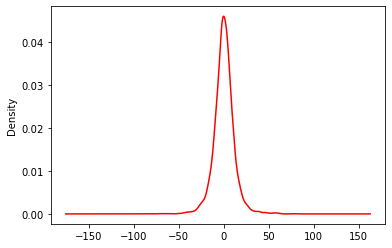

In [9]:
# 收益的概率分布图
data.iloc[start:end,:]['return'].plot(kind='kde',color='r')

<AxesSubplot:>

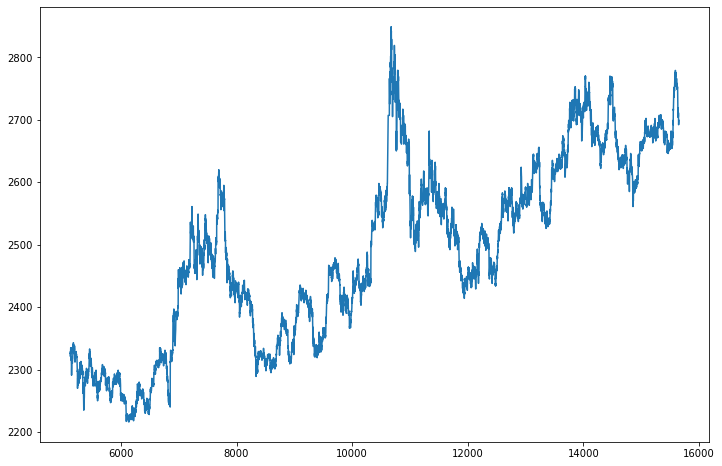

In [10]:
data.iloc[start:end,:]['close'].plot(figsize=(12,8))

In [11]:
data

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return
0,2020-09-14 21:05:00,2101.0,2322.0,2100.0,2101.0,5.0,111650.0,4.0,2106.0,5.0
1,2020-09-14 21:10:00,2101.0,2295.0,2101.0,2113.0,2.0,44100.0,5.0,2109.0,-4.0
2,2020-09-14 21:15:00,2113.0,2230.0,2113.0,2180.0,3.0,66450.0,7.0,2115.0,-65.0
3,2020-09-14 21:20:00,2180.0,2196.0,2113.0,2113.0,5.0,107500.0,9.0,2125.0,12.0
4,2020-09-14 21:25:00,2106.0,2177.0,2101.0,2120.0,14.0,296410.0,18.0,2116.0,-4.0
...,...,...,...,...,...,...,...,...,...,...
16687,2021-09-14 14:40:00,2880.0,2880.0,2880.0,2880.0,0.0,0.0,2277.0,NaN,NaN
16688,2021-09-14 14:45:00,2880.0,2880.0,2880.0,2880.0,0.0,0.0,2277.0,NaN,NaN
16689,2021-09-14 14:50:00,2880.0,2880.0,2880.0,2880.0,0.0,0.0,2277.0,NaN,NaN
16690,2021-09-14 14:55:00,2880.0,2880.0,2880.0,2880.0,0.0,0.0,2277.0,NaN,NaN


In [12]:
# 处理标签
data.loc[:,'label'] = 0
data.loc[data['return']>=4,'label'] = 1
data.loc[data['return']<=-4,'label'] = -1
data

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,label
0,2020-09-14 21:05:00,2101.0,2322.0,2100.0,2101.0,5.0,111650.0,4.0,2106.0,5.0,1
1,2020-09-14 21:10:00,2101.0,2295.0,2101.0,2113.0,2.0,44100.0,5.0,2109.0,-4.0,-1
2,2020-09-14 21:15:00,2113.0,2230.0,2113.0,2180.0,3.0,66450.0,7.0,2115.0,-65.0,-1
3,2020-09-14 21:20:00,2180.0,2196.0,2113.0,2113.0,5.0,107500.0,9.0,2125.0,12.0,1
4,2020-09-14 21:25:00,2106.0,2177.0,2101.0,2120.0,14.0,296410.0,18.0,2116.0,-4.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
16687,2021-09-14 14:40:00,2880.0,2880.0,2880.0,2880.0,0.0,0.0,2277.0,NaN,NaN,0
16688,2021-09-14 14:45:00,2880.0,2880.0,2880.0,2880.0,0.0,0.0,2277.0,NaN,NaN,0
16689,2021-09-14 14:50:00,2880.0,2880.0,2880.0,2880.0,0.0,0.0,2277.0,NaN,NaN,0
16690,2021-09-14 14:55:00,2880.0,2880.0,2880.0,2880.0,0.0,0.0,2277.0,NaN,NaN,0


In [13]:
len(data.iloc[start:end,:]),len(data)

(10533, 16692)

* 先做一期的模型，将因子和数据统筹好，然后再扩展到所有数据
* 拿8000个来训练，拿2500个来测试

In [14]:
from CreateFeatures import * 
import copy
data1 = copy.deepcopy(data)
data1

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,label
0,2020-09-14 21:05:00,2101.0,2322.0,2100.0,2101.0,5.0,111650.0,4.0,2106.0,5.0,1
1,2020-09-14 21:10:00,2101.0,2295.0,2101.0,2113.0,2.0,44100.0,5.0,2109.0,-4.0,-1
2,2020-09-14 21:15:00,2113.0,2230.0,2113.0,2180.0,3.0,66450.0,7.0,2115.0,-65.0,-1
3,2020-09-14 21:20:00,2180.0,2196.0,2113.0,2113.0,5.0,107500.0,9.0,2125.0,12.0,1
4,2020-09-14 21:25:00,2106.0,2177.0,2101.0,2120.0,14.0,296410.0,18.0,2116.0,-4.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
16687,2021-09-14 14:40:00,2880.0,2880.0,2880.0,2880.0,0.0,0.0,2277.0,NaN,NaN,0
16688,2021-09-14 14:45:00,2880.0,2880.0,2880.0,2880.0,0.0,0.0,2277.0,NaN,NaN,0
16689,2021-09-14 14:50:00,2880.0,2880.0,2880.0,2880.0,0.0,0.0,2277.0,NaN,NaN,0
16690,2021-09-14 14:55:00,2880.0,2880.0,2880.0,2880.0,0.0,0.0,2277.0,NaN,NaN,0


In [15]:
data1 = feature1(data1,13)
data1 = feature1(data1,21)
data1 = feature1(data1,34)
data1 = feature1(data1,55)
data1 = feature1(data1,89)
data1 = feature1(data1,144)
data1 = feature1(data1,233)

data1 = feature2(data1)

data1 = feature3(data1,3)
data1 = feature3(data1,5)
data1 = feature3(data1,8)
data1 = feature3(data1,13)
data1 = feature3(data1,21)
data1 = feature3(data1,34)
data1 = feature3(data1,55)

data1 = feature4(data1,'date')

data1 = feature5(data1,8)
data1 = feature5(data1,13)
data1 = feature5(data1,21)
data1 = feature5(data1,34)
data1 = feature5(data1,55)
data1 = feature5(data1,89)

data1 = feature6(data1,8)
data1 = feature6(data1,13)
data1 = feature6(data1,21)
data1 = feature6(data1,34)
data1 = feature6(data1,55)
data1 = feature6(data1,89)

In [16]:
data1.iloc[:,25:]

,feature3_55,feature4,feature5_8,feature5_13,feature5_21,feature5_34,feature5_55,feature5_89,feature6_8,feature6_13,feature6_21,feature6_34,feature6_55,feature6_89
0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16687,-0.003805,2,0.0,0.0,0.0,0.0,-0.196116,-0.753491,0.0,0.0,0.0,0.0,-0.003636,-0.012876
16688,-0.003805,2,0.0,0.0,0.0,0.0,-0.196116,-0.753491,0.0,0.0,0.0,0.0,-0.003636,-0.012876
16689,-0.003805,2,0.0,0.0,0.0,0.0,-0.196116,-0.753491,0.0,0.0,0.0,0.0,-0.003636,-0.012876
16690,0.000000,2,0.0,0.0,0.0,0.0,0.000000,-0.753491,0.0,0.0,0.0,0.0,0.000000,-0.012876


In [17]:
data1 = data1.iloc[start:end,:]
data1

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,...,feature5_21,feature5_34,feature5_55,feature5_89,feature6_8,feature6_13,feature6_21,feature6_34,feature6_55,feature6_89
5120,2021-01-06 14:30:00,2326.0,2327.0,2316.0,2322.0,577.0,13343750.0,30033.0,2325.0,3.0,...,-0.875242,-0.810224,-0.588172,-0.208779,-0.213697,-0.070828,-0.085850,-0.040624,-0.013222,-0.002399
5121,2021-01-06 14:35:00,2322.0,2326.0,2319.0,2325.0,448.0,10513570.0,29948.0,2329.0,4.0,...,-0.789352,-0.797867,-0.588172,-0.187619,-0.093341,-0.053179,-0.061110,-0.038898,-0.013222,-0.002146
5122,2021-01-06 14:40:00,2325.0,2327.0,2323.0,2324.0,215.0,5043900.0,29994.0,2326.0,2.0,...,-0.554700,-0.804176,-0.568432,-0.187619,-0.062378,-0.047284,-0.031730,-0.039761,-0.012561,-0.002146
5123,2021-01-06 14:45:00,2325.0,2329.0,2322.0,2326.0,172.0,4035120.0,30002.0,2329.0,3.0,...,-0.094809,-0.777245,-0.525822,-0.166195,-0.077888,-0.041385,-0.004535,-0.036308,-0.011239,-0.001894
5124,2021-01-06 14:50:00,2326.0,2327.0,2322.0,2326.0,85.0,1879900.0,30036.0,2332.0,6.0,...,-0.231621,-0.777245,-0.502894,-0.122662,-0.046824,-0.064951,-0.011337,-0.036308,-0.010578,-0.001389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15648,2021-08-24 14:20:00,2697.0,2698.0,2691.0,2692.0,1224.0,33582690.0,60299.0,2704.0,12.0,...,-0.945538,-0.880022,-0.824042,-0.328932,-0.213697,-0.186043,-0.137017,-0.054418,-0.026437,-0.003914
15649,2021-08-24 14:25:00,2692.0,2695.0,2688.0,2694.0,763.0,20927370.0,60304.0,2702.0,8.0,...,-0.938343,-0.854788,-0.813733,-0.338345,-0.169391,-0.094253,-0.128185,-0.048386,-0.025446,-0.004040
15650,2021-08-24 14:30:00,2695.0,2696.0,2693.0,2693.0,336.0,9213120.0,60160.0,2703.0,10.0,...,-0.940266,-0.854788,-0.830489,-0.338345,-0.284598,-0.123312,-0.130396,-0.048386,-0.027097,-0.004040
15651,2021-08-24 14:35:00,2693.0,2695.0,2686.0,2695.0,780.0,21384720.0,60083.0,2704.0,9.0,...,-0.932005,-0.854788,-0.827306,-0.401359,-0.154377,-0.140601,-0.121541,-0.048386,-0.026767,-0.004924


In [18]:
data1 = data1.reset_index(drop=True)
data1

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,...,feature5_21,feature5_34,feature5_55,feature5_89,feature6_8,feature6_13,feature6_21,feature6_34,feature6_55,feature6_89
0,2021-01-06 14:30:00,2326.0,2327.0,2316.0,2322.0,577.0,13343750.0,30033.0,2325.0,3.0,...,-0.875242,-0.810224,-0.588172,-0.208779,-0.213697,-0.070828,-0.085850,-0.040624,-0.013222,-0.002399
1,2021-01-06 14:35:00,2322.0,2326.0,2319.0,2325.0,448.0,10513570.0,29948.0,2329.0,4.0,...,-0.789352,-0.797867,-0.588172,-0.187619,-0.093341,-0.053179,-0.061110,-0.038898,-0.013222,-0.002146
2,2021-01-06 14:40:00,2325.0,2327.0,2323.0,2324.0,215.0,5043900.0,29994.0,2326.0,2.0,...,-0.554700,-0.804176,-0.568432,-0.187619,-0.062378,-0.047284,-0.031730,-0.039761,-0.012561,-0.002146
3,2021-01-06 14:45:00,2325.0,2329.0,2322.0,2326.0,172.0,4035120.0,30002.0,2329.0,3.0,...,-0.094809,-0.777245,-0.525822,-0.166195,-0.077888,-0.041385,-0.004535,-0.036308,-0.011239,-0.001894
4,2021-01-06 14:50:00,2326.0,2327.0,2322.0,2326.0,85.0,1879900.0,30036.0,2332.0,6.0,...,-0.231621,-0.777245,-0.502894,-0.122662,-0.046824,-0.064951,-0.011337,-0.036308,-0.010578,-0.001389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10528,2021-08-24 14:20:00,2697.0,2698.0,2691.0,2692.0,1224.0,33582690.0,60299.0,2704.0,12.0,...,-0.945538,-0.880022,-0.824042,-0.328932,-0.213697,-0.186043,-0.137017,-0.054418,-0.026437,-0.003914
10529,2021-08-24 14:25:00,2692.0,2695.0,2688.0,2694.0,763.0,20927370.0,60304.0,2702.0,8.0,...,-0.938343,-0.854788,-0.813733,-0.338345,-0.169391,-0.094253,-0.128185,-0.048386,-0.025446,-0.004040
10530,2021-08-24 14:30:00,2695.0,2696.0,2693.0,2693.0,336.0,9213120.0,60160.0,2703.0,10.0,...,-0.940266,-0.854788,-0.830489,-0.338345,-0.284598,-0.123312,-0.130396,-0.048386,-0.027097,-0.004040
10531,2021-08-24 14:35:00,2693.0,2695.0,2686.0,2695.0,780.0,21384720.0,60083.0,2704.0,9.0,...,-0.932005,-0.854788,-0.827306,-0.401359,-0.154377,-0.140601,-0.121541,-0.048386,-0.026767,-0.004924


In [19]:
#以时间列为索引
# data = data.set_index('date')
# data

In [20]:
# 截取因子，收益率
col_list = [x for x in list(data1.columns) if 'feature' in x]
col_list

['feature1_13',
 'feature1_21',
 'feature1_34',
 'feature1_55',
 'feature1_89',
 'feature1_144',
 'feature1_233',
 'feature2',
 'feature3_3',
 'feature3_5',
 'feature3_8',
 'feature3_13',
 'feature3_21',
 'feature3_34',
 'feature3_55',
 'feature4',
 'feature5_8',
 'feature5_13',
 'feature5_21',
 'feature5_34',
 'feature5_55',
 'feature5_89',
 'feature6_8',
 'feature6_13',
 'feature6_21',
 'feature6_34',
 'feature6_55',
 'feature6_89']

In [21]:
# 特征矩阵
X = data1[col_list]
X

,feature1_13,feature1_21,feature1_34,feature1_55,feature1_89,feature1_144,feature1_233,feature2,feature3_3,feature3_5,...,feature5_21,feature5_34,feature5_55,feature5_89,feature6_8,feature6_13,feature6_21,feature6_34,feature6_55,feature6_89
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017816,-0.003861,-0.003861,...,-0.875242,-0.810224,-0.588172,-0.208779,-0.213697,-0.070828,-0.085850,-0.040624,-0.013222,-0.002399
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005088,-0.002574,-0.001717,...,-0.789352,-0.797867,-0.588172,-0.187619,-0.093341,-0.053179,-0.061110,-0.038898,-0.013222,-0.002146
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003247,-0.000860,-0.003003,...,-0.554700,-0.804176,-0.568432,-0.187619,-0.062378,-0.047284,-0.031730,-0.039761,-0.012561,-0.002146
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.035782,0.001723,-0.002145,...,-0.094809,-0.777245,-0.525822,-0.166195,-0.077888,-0.041385,-0.004535,-0.036308,-0.011239,-0.001894
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.064417,0.000430,0.000000,...,-0.231621,-0.777245,-0.502894,-0.122662,-0.046824,-0.064951,-0.011337,-0.036308,-0.010578,-0.001389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106515,-0.006275,-0.004806,...,-0.945538,-0.880022,-0.824042,-0.328932,-0.213697,-0.186043,-0.137017,-0.054418,-0.026437,-0.003914
10529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090322,-0.002592,-0.006271,...,-0.938343,-0.854788,-0.813733,-0.338345,-0.169391,-0.094253,-0.128185,-0.048386,-0.025446,-0.004040
10530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071657,-0.001483,-0.005906,...,-0.940266,-0.854788,-0.830489,-0.338345,-0.284598,-0.123312,-0.130396,-0.048386,-0.027097,-0.004040
10531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037654,0.001114,-0.002221,...,-0.932005,-0.854788,-0.827306,-0.401359,-0.154377,-0.140601,-0.121541,-0.048386,-0.026767,-0.004924


In [22]:
# 标签
Y = data1['label']
Y

0        0
1        1
2        0
3        0
4        1
        ..
10528    1
10529    1
10530    1
10531    1
10532    1
Name: label, Length: 10533, dtype: int64

In [23]:
# 特征矩阵缺失值情况
X.isnull().mean()

feature1_13     0.0
feature1_21     0.0
feature1_34     0.0
feature1_55     0.0
feature1_89     0.0
feature1_144    0.0
feature1_233    0.0
feature2        0.0
feature3_3      0.0
feature3_5      0.0
feature3_8      0.0
feature3_13     0.0
feature3_21     0.0
feature3_34     0.0
feature3_55     0.0
feature4        0.0
feature5_8      0.0
feature5_13     0.0
feature5_21     0.0
feature5_34     0.0
feature5_55     0.0
feature5_89     0.0
feature6_8      0.0
feature6_13     0.0
feature6_21     0.0
feature6_34     0.0
feature6_55     0.0
feature6_89     0.0
dtype: float64

In [24]:
# 标签的缺失值情况
Y.isnull().sum()

0

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2,random_state=420)
#恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [26]:
Xtrain.head()

,feature1_13,feature1_21,feature1_34,feature1_55,feature1_89,feature1_144,feature1_233,feature2,feature3_3,feature3_5,...,feature5_21,feature5_34,feature5_55,feature5_89,feature6_8,feature6_13,feature6_21,feature6_34,feature6_55,feature6_89
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.030554,0.000000,0.003052,...,0.885398,0.901919,0.858315,0.718728,0.093341,0.047284,0.090332,0.061303,0.030399,0.011614
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.411770,0.003246,0.007241,...,0.890043,0.592390,-0.279330,0.644400,0.479812,0.213869,0.092571,0.021621,-0.005289,0.009468
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.136581,0.003263,0.005724,...,-0.141421,-0.357137,-0.072536,0.166195,0.015623,0.017749,-0.006803,-0.011245,-0.001322,0.001894
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.064515,0.001742,-0.000869,...,0.650791,0.487821,0.453683,0.319420,0.062378,0.047284,0.040782,0.016434,0.009256,0.003787
4,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-0.067855,-0.001218,0.000407,...,0.274721,0.648947,0.371391,0.356868,0.062378,0.000000,0.013604,0.025079,0.007273,0.004292


In [27]:
# #是否有样本不平衡问题？ 有轻微的样本不均衡问题
Ytrain.value_counts()

 1    2939
-1    2770
 0    2717
Name: label, dtype: int64

In [28]:
Ytest.value_counts()

 1    727
-1    694
 0    686
Name: label, dtype: int64

In [29]:
#描述性统计
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,8426.0,-0.004510,0.423610,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,8426.0,-0.001780,0.354534,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,8426.0,0.000119,0.298164,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,8426.0,-0.001068,0.279676,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,8426.0,-0.001662,0.250809,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,8426.0,-0.002374,0.216789,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,8426.0,-0.001305,0.175329,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2,8426.0,0.281420,12.300168,-310.169581,-8.283172,-1.919604,-0.997073,-0.312825,0.004914,0.344124,1.037261,11.503022,737.660627
feature3_3,8426.0,0.000045,0.003497,-0.031079,-0.008984,-0.005213,-0.003795,-0.001879,0.000000,0.001925,0.003795,0.009629,0.031696
feature3_5,8426.0,0.000044,0.004421,-0.033200,-0.011465,-0.006800,-0.004862,-0.002304,0.000000,0.002355,0.004858,0.012190,0.034821


In [30]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,2107.0,0.008068,0.410489,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,2107.0,0.001424,0.349328,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,2107.0,-0.002373,0.313504,-1.000000,-1.000000,-0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,2107.0,-0.001424,0.291536,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,2107.0,0.003322,0.247472,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,2107.0,0.009492,0.213293,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,2107.0,0.001898,0.174315,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2,2107.0,0.379753,35.621246,-546.778516,-12.268786,-2.130225,-1.117759,-0.331194,-0.013263,0.335994,1.047414,11.212102,1510.265443
feature3_3,2107.0,0.000061,0.003598,-0.029334,-0.009347,-0.005158,-0.003840,-0.001879,0.000000,0.001892,0.003897,0.010374,0.025266
feature3_5,2107.0,0.000219,0.004770,-0.027139,-0.011903,-0.006871,-0.004905,-0.002219,0.000000,0.002581,0.005362,0.014490,0.027543


In [31]:
# 找出分类型特征
classf = [x for x in list(Xtrain.columns) if 'feature1' in x or 'feature4' in x]
classf

['feature1_13',
 'feature1_21',
 'feature1_34',
 'feature1_55',
 'feature1_89',
 'feature1_144',
 'feature1_233',
 'feature4']

In [32]:
# 找出连续型特征
col = Xtrain.columns.tolist()
for i in classf:
    col.remove(i)
col

['feature2',
 'feature3_3',
 'feature3_5',
 'feature3_8',
 'feature3_13',
 'feature3_21',
 'feature3_34',
 'feature3_55',
 'feature5_8',
 'feature5_13',
 'feature5_21',
 'feature5_34',
 'feature5_55',
 'feature5_89',
 'feature6_8',
 'feature6_13',
 'feature6_21',
 'feature6_34',
 'feature6_55',
 'feature6_89']

In [33]:
# 无量纲化
from sklearn.preprocessing import StandardScaler      # 数据转换为均值为0，方差为1的数据  标准化不改变数据的分布，不会把数据变成正态分布
ss = StandardScaler()
ss = ss.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])

In [34]:
ss

StandardScaler()

In [36]:
# 保存无量纲化模型
import joblib
joblib.dump(ss, "./ss.pkl")
# 加载模型
ss1 = joblib.load("./ss.pkl")
ss1

StandardScaler()

In [37]:
Xtrain.head()

,feature1_13,feature1_21,feature1_34,feature1_55,feature1_89,feature1_144,feature1_233,feature2,feature3_3,feature3_5,...,feature5_21,feature5_34,feature5_55,feature5_89,feature6_8,feature6_13,feature6_21,feature6_34,feature6_55,feature6_89
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.025365,-0.012754,0.680459,...,1.518746,1.723939,1.875252,1.777461,0.458797,0.429541,1.674053,2.351183,2.446113,1.880370
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091903,0.915508,1.628065,...,1.526821,1.121423,-0.668359,1.587857,2.395647,2.005855,1.716253,0.801179,-0.492002,1.519874
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.033985,0.920387,1.284775,...,-0.266318,-0.726890,-0.205998,0.367995,0.069305,0.150059,-0.156554,-0.482598,-0.165421,0.247393
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.028126,0.485517,-0.206570,...,1.110896,0.917873,0.970552,0.758859,0.303625,0.429541,0.740235,0.598553,0.705443,0.565527
4,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-0.028398,-0.361119,0.081970,...,0.457121,1.231513,0.786558,0.854386,0.303625,-0.017889,0.228033,0.936227,0.542167,0.650362


In [38]:
Xtest.head()

,feature1_13,feature1_21,feature1_34,feature1_55,feature1_89,feature1_144,feature1_233,feature2,feature3_3,feature3_5,...,feature5_21,feature5_34,feature5_55,feature5_89,feature6_8,feature6_13,feature6_21,feature6_34,feature6_55,feature6_89
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.118411,-0.012754,0.786212,...,0.842042,-0.580954,1.180670,1.285053,0.612623,0.652319,0.484276,-0.381245,0.923131,1.095733
1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.031072,-0.468543,0.351636,...,-0.882973,-0.817410,-1.829565,-1.227214,0.147545,-0.799091,-0.540980,-0.550162,-2.042715,-1.046350
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.264272,-0.957714,-0.840194,...,-1.473884,-0.529811,-0.404884,0.449722,-0.630607,-1.989342,-1.392281,-0.347459,-0.301498,0.311020
3,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006302,-0.259206,-0.107536,...,-0.498051,0.360829,-0.773871,0.087128,-0.087289,-0.185836,-0.284737,0.193161,-0.573644,0.035302
4,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.039158,-0.462452,-1.777375,...,0.842042,1.205741,1.106521,0.503336,-0.706885,0.317848,0.484276,0.902468,0.841500,0.353438


In [39]:
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,8426.0,-4.509850e-03,0.423610,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,8426.0,-1.780204e-03,0.354534,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,8426.0,1.186803e-04,0.298164,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,8426.0,-1.068122e-03,0.279676,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,8426.0,-1.661524e-03,0.250809,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,8426.0,-2.373606e-03,0.216789,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,8426.0,-1.305483e-03,0.175329,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2,8426.0,1.516246e-17,1.000059,-25.241071,-0.696340,-0.178953,-0.103947,-0.048315,-0.022481,0.005098,0.061453,0.912367,59.952266
feature3_3,8426.0,-2.927742e-17,1.000059,-8.901478,-2.582255,-1.503647,-1.098173,-0.550211,-0.012754,0.537844,1.072573,2.741279,9.052671
feature3_5,8426.0,-3.778263e-17,1.000059,-7.520450,-2.603692,-1.548217,-1.109828,-0.531323,-0.010027,0.522831,1.088986,2.747635,7.867295


In [40]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,2107.0,0.008068,0.410489,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,2107.0,0.001424,0.349328,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,2107.0,-0.002373,0.313504,-1.000000,-1.000000,-0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,2107.0,-0.001424,0.291536,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,2107.0,0.003322,0.247472,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,2107.0,0.009492,0.213293,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,2107.0,0.001898,0.174315,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2,2107.0,0.007995,2.896168,-44.478448,-1.020389,-0.196078,-0.113760,-0.049808,-0.023959,0.004437,0.062279,0.888714,122.768533
feature3_3,2107.0,0.004562,1.029113,-8.402602,-2.686188,-1.488098,-1.111103,-0.550161,-0.012754,0.528318,1.101755,2.954195,7.213506
feature3_5,2107.0,0.039420,1.079024,-6.149446,-2.702806,-1.564386,-1.119726,-0.511924,-0.010027,0.573893,1.202965,3.267907,6.220836


In [41]:
# 训练模型

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
# 查看测试集上的分数
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(n_estimators=200,random_state=30)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtrain,Ytrain)
score_r = rfc.score(Xtrain,Ytrain)

score_c,score_r   # 由结果看出随机森林的效果比单个决策树要好

(1.0, 1.0)

In [44]:
# 查看测试集上的分数
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

score_c,score_r   # 由结果看出随机森林的效果比单个决策树要好score_c = clf.score(Xtest,Ytest)

(0.4053156146179402, 0.4959658281917418)

### **模型的保存与加载**

In [45]:
# 保存模型
import joblib

In [46]:
joblib.dump(rfc, "./test.pkl")

['./test.pkl']

In [47]:
# 加载模型
estimator = joblib.load("./test.pkl")

In [48]:
# 评分
escore = estimator.score(Xtest,Ytest)
escore

0.4959658281917418

In [61]:
# 查看模型重要性参数
# 查看模型参数
rfc.feature_importances_

array([0.00750847, 0.00581822, 0.00450855, 0.00449468, 0.00408458,
       0.00329315, 0.00243372, 0.05823239, 0.05789603, 0.057673  ,
       0.05330048, 0.05140767, 0.05258518, 0.05381929, 0.05344096,
       0.02746339, 0.03492386, 0.03731411, 0.03955316, 0.0418367 ,
       0.0441918 , 0.05402066, 0.03428318, 0.03682307, 0.03994485,
       0.04180157, 0.04374375, 0.05360354])

In [63]:
# 预测值
y_predict = rfc.predict(Xtest)

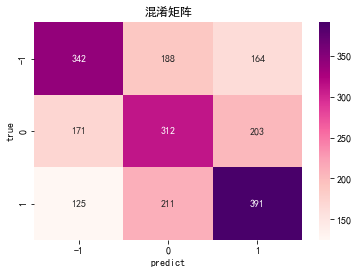

In [64]:
# 模型评估
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(Ytest,y_predict,labels=[-1,0,1])
plt.rcParams['font.family']=['sans-serif']
plt.rcParams['font.sans-serif']=['SimHei']
# plt.matshow(cfm)
# plt.show()
f,ax = plt.subplots()
sns.heatmap(cfm,annot=True,ax=ax,xticklabels=[-1,0,1],yticklabels=[-1,0,1],fmt="d",cmap="RdPu")
ax.set_title('混淆矩阵')
ax.set_xlabel('predict')
ax.set_ylabel('true')
plt.show()

In [67]:
(cfm[0,0]+cfm[1,1]+cfm[2,2])/cfm.sum()

0.4959658281917418

In [68]:
(cfm.sum()-cfm[2,0]-cfm[0,2])/cfm.sum()

0.8628381585192216

In [65]:
# svm
from time import time
from sklearn.svm import SVC
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=5000
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.381111
00:20:468261
The accuracy under kernel poly is 0.366872
00:04:810136
The accuracy under kernel rbf is 0.423825
00:07:897878
The accuracy under kernel sigmoid is 0.354533
00:04:221708


In [21]:
fea_list = [x for x in list(data.columns) if 'feature1' in x or 'feature4' in x]
fea_list

['feature1_13',
 'feature1_21',
 'feature1_34',
 'feature1_55',
 'feature1_89',
 'feature1_144',
 'feature1_233',
 'feature2',
 'feature3_3',
 'feature3_5',
 'feature3_8',
 'feature3_13',
 'feature3_21',
 'feature3_34',
 'feature3_55',
 'feature4',
 'feature5_8',
 'feature5_13',
 'feature5_21',
 'feature5_34',
 'feature5_55',
 'feature5_89']

In [22]:
X = data[fea_list]
y = data.label

In [23]:
# 标准化
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)  # 转化为0-1之间的正态分布
dt = pd.DataFrame(X)
dt.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,10533.0,-1.793052e-16,1.000047,-2.370511,-2.370511,-2.370511,0.004736,0.004736,0.004736,0.004736,0.004736,2.379982,2.379982
1,10533.0,1.178499e-16,1.000047,-2.825890,-2.825890,-2.825890,0.003223,0.003223,0.003223,0.003223,0.003223,2.832337,2.832337
2,10533.0,3.390515e-16,1.000047,-3.318047,-3.318047,0.001261,0.001261,0.001261,0.001261,0.001261,0.001261,3.320568,3.320568
3,10533.0,-4.179107e-16,1.000047,-3.541298,-3.541298,0.004039,0.004039,0.004039,0.004039,0.004039,0.004039,3.549377,3.549377
4,10533.0,7.006723e-17,1.000047,-3.995270,-3.995270,0.002657,0.002657,0.002657,0.002657,0.002657,0.002657,4.000584,4.000584
5,10533.0,-1.686468e-19,1.000047,-4.626936,-4.626936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.626936,4.626936
6,10533.0,2.220514e-16,1.000047,-5.706754,-5.706754,0.003795,0.003795,0.003795,0.003795,0.003795,0.003795,5.714345,5.714345
7,10533.0,-5.388463e-18,1.000047,-28.261656,-0.467628,-0.116967,-0.068300,-0.031841,-0.015492,0.002170,0.038115,0.577455,78.003444
8,10533.0,-5.044648e-17,1.000047,-8.850677,-2.575990,-1.493145,-1.094752,-0.548073,-0.013587,0.531555,1.076113,2.761534,8.999177
9,10533.0,-7.129280e-17,1.000047,-7.407100,-2.605403,-1.538547,-1.101301,-0.524635,-0.017624,0.524366,1.080078,2.846310,7.732842


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.25,random_state=420)

In [25]:
Xtrain

array([[ 4.73561037e-03,  3.22314256e-03,  3.32056768e+00, ...,
        -6.76726638e-01, -1.47129044e+00, -7.45762815e-01],
       [ 4.73561037e-03,  3.22314256e-03,  1.26053628e-03, ...,
         1.57528540e+00,  1.61338855e+00,  1.43982700e-01],
       [ 4.73561037e-03,  3.22314256e-03,  1.26053628e-03, ...,
        -8.75394111e-02,  3.95394794e-01,  3.40333330e-01],
       ...,
       [ 4.73561037e-03,  3.22314256e-03,  1.26053628e-03, ...,
        -1.53971678e+00, -1.50689850e+00, -1.39683165e+00],
       [ 4.73561037e-03,  3.22314256e-03,  1.26053628e-03, ...,
        -1.57976174e+00, -1.43371890e+00, -1.54509027e+00],
       [ 4.73561037e-03,  3.22314256e-03,  1.26053628e-03, ...,
         1.54285305e+00,  1.74688672e+00,  1.76744564e+00]])

In [26]:
# 查看测试集上的分数
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(n_estimators=200,random_state=30)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtrain,Ytrain)
score_r = rfc.score(Xtrain,Ytrain)

score_c,score_r   # 由结果看出随机森林的效果比单个决策树要好

(1.0, 1.0)

In [27]:
# 查看测试集上的分数
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

score_c,score_r   # 由结果看出随机森林的效果比单个决策树要好score_c = clf.score(Xtest,Ytest)

(0.4123006833712984, 0.5049354593773728)

In [28]:
# 查看模型重要性参数
# 查看模型参数
rfc.feature_importances_

array([0.00980686, 0.00728087, 0.00595572, 0.0059442 , 0.00520467,
       0.00441834, 0.00314956, 0.07347753, 0.07123893, 0.07207699,
       0.06969446, 0.06855676, 0.0703072 , 0.07045933, 0.07205841,
       0.03266471, 0.04970784, 0.05357099, 0.0567534 , 0.05985133,
       0.06208024, 0.07574168])

In [29]:
# 预测的概率
rfc.predict_proba(Xtest)

array([[0.26 , 0.4  , 0.34 ],
       [0.405, 0.325, 0.27 ],
       [0.34 , 0.28 , 0.38 ],
       ...,
       [0.285, 0.265, 0.45 ],
       [0.345, 0.405, 0.25 ],
       [0.26 , 0.37 , 0.37 ]])

In [31]:
# 预测值
y_predict = rfc.predict(Xtest)

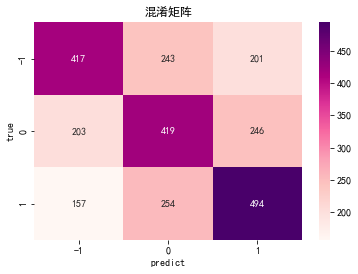

In [33]:
# 模型评估
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(Ytest,y_predict,labels=[-1,0,1])
plt.rcParams['font.family']=['sans-serif']
plt.rcParams['font.sans-serif']=['SimHei']
# plt.matshow(cfm)
# plt.show()
f,ax = plt.subplots()
sns.heatmap(cfm,annot=True,ax=ax,xticklabels=[-1,0,1],yticklabels=[-1,0,1],fmt="d",cmap="RdPu")
ax.set_title('混淆矩阵')
ax.set_xlabel('predict')
ax.set_ylabel('true')
plt.show()

In [37]:
# svm
from time import time
from sklearn.svm import SVC
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=5000
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.373956
00:16:800949
The accuracy under kernel poly is 0.370919
00:04:548836
The accuracy under kernel rbf is 0.388383
00:08:093360
The accuracy under kernel sigmoid is 0.327639
00:03:663204


[0.3921791951404708][0.3921791951404708, 0.4035687167805619][0.3921791951404708, 0.4035687167805619, 0.4160971905846621][0.3921791951404708, 0.4035687167805619, 0.4160971905846621, 0.428246013667426][0.3921791951404708, 0.4035687167805619, 0.4160971905846621, 0.428246013667426, 0.43318147304479876][0.3921791951404708, 0.4035687167805619, 0.4160971905846621, 0.428246013667426, 0.43318147304479876, 0.43470007593014426][0.3921791951404708, 0.4035687167805619, 0.4160971905846621, 0.428246013667426, 0.43318147304479876, 0.43470007593014426, 0.43394077448747154][0.3921791951404708, 0.4035687167805619, 0.4160971905846621, 0.428246013667426, 0.43318147304479876, 0.43470007593014426, 0.43394077448747154, 0.4407744874715262][0.3921791951404708, 0.4035687167805619, 0.4160971905846621, 0.428246013667426, 0.43318147304479876, 0.43470007593014426, 0.43394077448747154, 0.4407744874715262, 0.4407744874715262][0.3921791951404708, 0.4035687167805619, 0.4160971905846621, 0.428246013667426, 0.433181473044

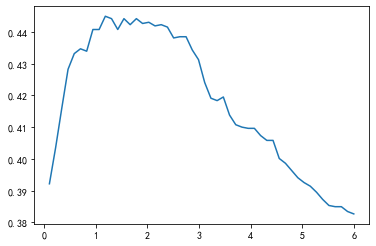

In [45]:
# 调gamma
score = []
gamma_range = np.linspace(0.1,6,50) #返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    print(str(score), end='', flush=True)
    
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

In [42]:
np.logspace(-1, 1, 20)

array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])

In [44]:
np.linspace(0.1,6,50)

array([0.1       , 0.22040816, 0.34081633, 0.46122449, 0.58163265,
       0.70204082, 0.82244898, 0.94285714, 1.06326531, 1.18367347,
       1.30408163, 1.4244898 , 1.54489796, 1.66530612, 1.78571429,
       1.90612245, 2.02653061, 2.14693878, 2.26734694, 2.3877551 ,
       2.50816327, 2.62857143, 2.74897959, 2.86938776, 2.98979592,
       3.11020408, 3.23061224, 3.35102041, 3.47142857, 3.59183673,
       3.7122449 , 3.83265306, 3.95306122, 4.07346939, 4.19387755,
       4.31428571, 4.43469388, 4.55510204, 4.6755102 , 4.79591837,
       4.91632653, 5.03673469, 5.15714286, 5.27755102, 5.39795918,
       5.51836735, 5.63877551, 5.75918367, 5.87959184, 6.        ])